In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

df = pd.read_csv('ex2data1.txt', header=None)
print(df.shape)
df.head()

df.info()

df.describe()

(100, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       100 non-null    float64
 1   1       100 non-null    float64
 2   2       100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


,0,1,2
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


In [4]:
df.columns = ['exam1', 'exam2', 'admitted']

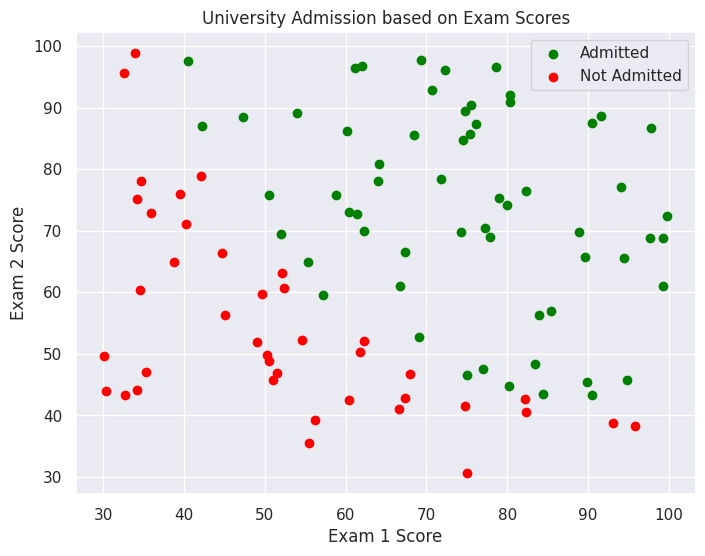

In [5]:
import matplotlib.pyplot as plt

admitted = df[df['admitted'] == 1]
not_admitted = df[df['admitted'] == 0]

plt.figure(figsize=(8,6))
plt.scatter(admitted['exam1'], admitted['exam2'], color='green', label='Admitted')
plt.scatter(not_admitted['exam1'], not_admitted['exam2'], color='red', label='Not Admitted')
plt.xlabel('Exam 1 Score')
plt.ylabel('Exam 2 Score')
plt.title('University Admission based on Exam Scores')
plt.legend()
plt.show()


scikit-learn

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 1. Подготовка данных
X = df[['exam1', 'exam2']]
y = df['admitted']

# 2. Создаем и обучаем модель
model = LogisticRegression()
model.fit(X, y)

# 3. Прогнозы на тех же данных
y_pred = model.predict(X)

# 4. Расчет точности (accuracy)
accuracy = accuracy_score(y, y_pred)
print(f"Accuracy модели: {accuracy:.4f}")

# 5. Интерпретация результатов
print("Коэффициенты модели:", model.coef_)
print("Сдвиг (intercept):", model.intercept_)

# Дополнительно можно посмотреть, как модель предсказывает вероятность поступления
y_prob = model.predict_proba(X)[:, 1]  # вероятность класса 1 (поступление)
print("Примеры вероятностей поступления для первых 5 студентов:\n", y_prob[:5])


Accuracy модели: 0.8900
Коэффициенты модели: [[0.20535491 0.2005838 ]]
Сдвиг (intercept): [-25.05219314]
Примеры вероятностей поступления для первых 5 студентов:
 [9.18239681e-02 4.41425284e-05 4.44572493e-02 9.90230737e-01
 9.98149467e-01]


In [8]:
from sklearn.model_selection import train_test_split

X = df[['exam1', 'exam2']]
y = df['admitted']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучаем модель на тренировочных данных
model = LogisticRegression()
model.fit(X_train, y_train)

# Оцениваем на тестовых
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test accuracy: {accuracy:.4f}")


Test accuracy: 0.8000


In [9]:
from sklearn.metrics import classification_report

# Предсказания модели на тестовой выборке
y_pred = model.predict(X_test)

# Классификационный отчёт
report = classification_report(y_test, y_pred, target_names=['Not Admitted', 'Admitted'])
print(report)


              precision    recall  f1-score   support

Not Admitted       0.70      0.88      0.78         8
    Admitted       0.90      0.75      0.82        12

    accuracy                           0.80        20
   macro avg       0.80      0.81      0.80        20
weighted avg       0.82      0.80      0.80        20



ROC

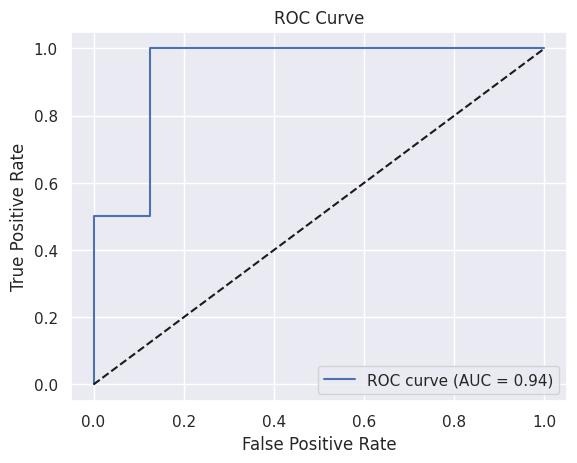

In [11]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_prob = model.predict_proba(X_test)[:,1]  # вероятности класса 1

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0,1], [0,1], 'k--')  # диагональ случайного угадывания
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()



Brief evaluation of the logistic regression model
The model predicts admission to a university based on two exams.

Both exams have approximately the same effect on the result - the higher the scores, the higher the chance of admission.

On new data, the model shows an accuracy of about 80%, which is good for such a simple model.

The precision and recall metrics show that the model is good at identifying both admitted and rejected students.

The AUC value of 0.94 indicates that the model is good at separating the two classes.

The model can be used for predictions, but to improve it, you can add more data and conduct additional testing.